In [15]:
import numpy as np
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pyfaidx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tf2onnx
import onnx
from onnx2pytorch import ConvertModel
import datetime
import tensorflow as tf
import tensorflow.keras.layers as kl
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Reshape, Dense, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization, InputLayer, Input, GlobalAvgPool1D, GlobalMaxPooling1D, LSTM
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, History, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.utils import plot_model
import torch
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
import sys
sys.path.append('/groups/stark/heinzl/Projects/DeepSTARR/DeepSTARR/Neural_Network_DNA_Demo/')
from helper import IOHelper, SequenceHelper # from https://github.com/bernardo-de-almeida/Neural_Network_DNA_Demo.git
sys.path.append('/groups/stark/shenzhi.chen/projects/transferLearningMammalianEnhancerDesign202408/scripts/jupyterNotebook/Taskiran_et_al_Supplemental_Code/General/')
import utils
import random

In [18]:
def plot_dinucleotide_contribution(one_hot_matrix, save_path=None, sequence_length=None):
    """
    Plot dinucleotide contributions from one-hot encoded matrix as percentages and save as PDF
    
    Parameters:
    one_hot_matrix: numpy array of shape (n_sequences, sequence_length, 4)
                   where 4 represents A,C,G,T/U
    save_path: str, path to save the PDF file (e.g., 'path/to/plot.pdf')
    sequence_length: int, length of sequences (optional)
    """
    # If sequence length not provided, infer from matrix
    if sequence_length is None:
        sequence_length = one_hot_matrix.shape[1]
    
    # Define nucleotides
    nucleotides = ['A', 'C', 'G', 'T']
    
    # Calculate dinucleotide frequencies
    dinuc_counts = {}
    
    # Convert one-hot matrix back to sequences
    sequences = []
    for seq in one_hot_matrix:
        sequence = ''
        for pos in seq:
            nucleotide_index = np.argmax(pos)
            sequence += nucleotides[nucleotide_index]
        sequences.append(sequence)
    
    # Count dinucleotides
    total_dinuc = 0
    for seq in sequences:
        for i in range(len(seq)-1):
            dinuc = seq[i:i+2]
            if dinuc in dinuc_counts:
                dinuc_counts[dinuc] += 1
            else:
                dinuc_counts[dinuc] = 1
            total_dinuc += 1
    
    # Convert counts to percentages
    dinuc_percentages = {k: (v/total_dinuc)*100 for k, v in dinuc_counts.items()}
    
    import matplotlib.pyplot as plt
    # Create bar plot
    plt.figure(figsize=(12, 6))
    
    # Sort dinucleotides by percentage
    sorted_dinucs = sorted(dinuc_percentages.items(), key=lambda x: x[1], reverse=True)
    dinucs = [x[0] for x in sorted_dinucs]
    percentages = [x[1] for x in sorted_dinucs]
    
    # Plot
    bars = plt.bar(dinucs, percentages)
    plt.title('Dinucleotide Distribution (%)', fontsize=14)
    plt.xlabel('Dinucleotides', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=45)
    
    # Add percentage labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',  # Display with 1 decimal place
                ha='center', va='bottom')
    
    plt.tight_layout()
    
    # Save plot if path is provided
    if save_path:
        # Handle directory creation only if there's a directory path
        directory = os.path.dirname(save_path)
        if directory:
            os.makedirs(directory, exist_ok=True)
        plt.savefig(save_path, format='pdf', bbox_inches='tight', dpi=300)
        print(f"Plot saved to: {save_path}")
    
    plt.show()

In [2]:
reference_path = "/groups/stark/shenzhi.chen/projects/transferLearningMammalianEnhancerDesign202408/db/training_dataset/VISTA_20240901/all_vista_seq.fa"

In [4]:
adjusted_sequences = utils.random_sequence_dinucleotide_adjusted(1001,100,reference_path)

In [5]:
vista_sequences = utils.prepare_data("/groups/stark/shenzhi.chen/projects/transferLearningMammalianEnhancerDesign202408/db/training_dataset/VISTA_20240901/all_vista_seq.fa")

Plot saved to: /groups/stark/shenzhi.chen/projects/transferLearningMammalianEnhancerDesign202408/pdf/dinuceotide_content_distribution_vista.pdf


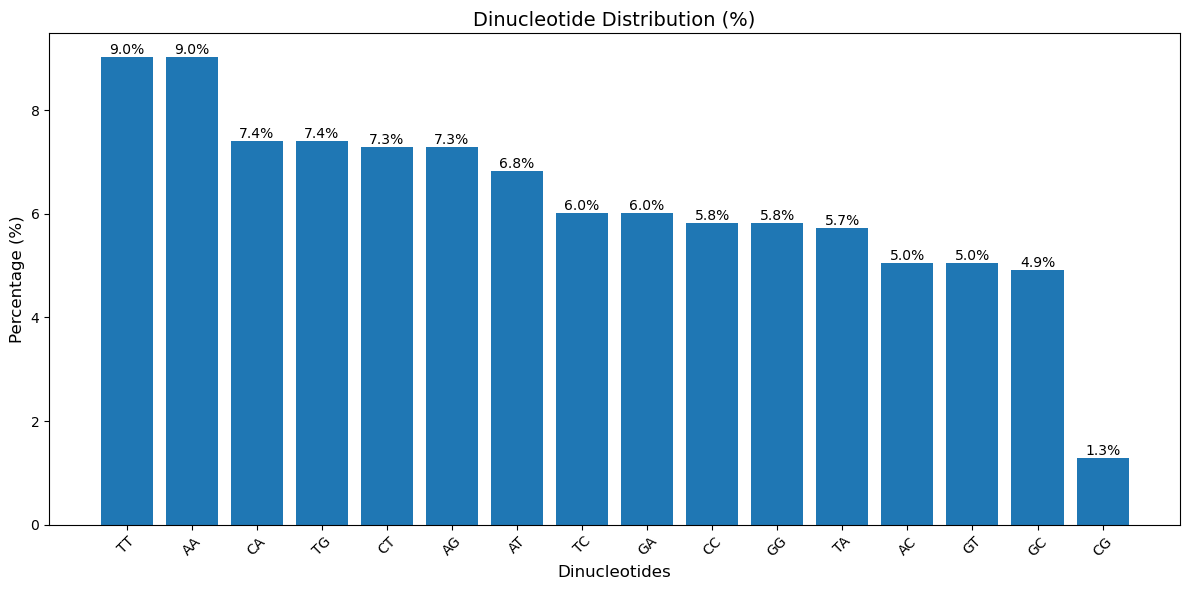

In [ ]:
import os
plot_dinucleotide_contribution(vista_sequences[0],save_path="/groups/stark/shenzhi.chen/projects/transferLearningMammalianEnhancerDesign202408/pdf/dinuceotide_content_distribution_vista.pdf")